#==============================================

**Relatório Técnico sobre Mineração de Dados**
* PPCIC
* Mestrado em Ciência da Computação
* Disciplina: Mineração de Dados
* Professor: Eduardo Ogasawara

**Time:**
* Abel Soares de Queiroz Júnior
* Janio de Souza Lima
* Luiz Augusto de Souza Perciliano

#==============================================

In [1]:
setwd("E:/Users/janio/Documents/Education/Mestrado e Doutorado/CEFET/Disciplinas/1. Mineração de dados/Trabalho")
getwd()

[1] "E:/Users/janio/Documents/Education/Mestrado e Doutorado/CEFET/Disciplinas/1. Mineração de dados/Trabalho"

#==============================================

**Data Set - Incêndios em Florestas Brasileiras**

#==============================================


Este dataset apresenta informações sobre incêndios ocorridos no Brasil de 1998 a 2017, por mês e estado.

In [2]:
#Fonte dos dados:https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil?select=amazon.csv
#Carga dos dados
incendios = read.csv("amazon.csv")
head(incendios)

year,state,month,number,date
1998,Acre,Janeiro,0,1998-01-01
1999,Acre,Janeiro,0,1999-01-01
2000,Acre,Janeiro,0,2000-01-01
2001,Acre,Janeiro,0,2001-01-01
2002,Acre,Janeiro,0,2002-01-01
2003,Acre,Janeiro,10,2003-01-01


#=========================

**Análise exploratória**

#=========================

As próximas células apresentam os dados básicos do dataset analisado

In [3]:
#Atributos
names(incendios)
sapply(incendios, class)

[1] "year"   "state"  "month"  "number" "date"

year     state     month    number      date 
"integer"  "factor"  "factor" "numeric"  "factor"

In [4]:
str(incendios)

'data.frame':	6454 obs. of  5 variables:
 $ year  : int  1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 ...
 $ state : Factor w/ 23 levels "Acre","Alagoas",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month : Factor w/ 12 levels "Abril","Agosto",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ number: num  0 0 0 0 0 10 0 12 4 0 ...
 $ date  : Factor w/ 20 levels "1998-01-01","1999-01-01",..: 1 2 3 4 5 6 7 8 9 10 ...


Na sumarização dos dados, conseguimos verificar o período de abrangência (year), bem como uma visão preliminar da distribuição das observações por mês e estado.
Estas informações serão melhor analisadas adiante, com algumas formas de agrupamento e geração de visualizações.

In [5]:
#Distribuição estatística dos dados
summary(incendios)

      year              state            month          number     
 Min.   :1998   Rio        : 717   Janeiro  : 541   Min.   :  0.0  
 1st Qu.:2002   Mato Grosso: 478   Abril    : 540   1st Qu.:  3.0  
 Median :2007   Paraiba    : 478   Agosto   : 540   Median : 24.0  
 Mean   :2007   Alagoas    : 240   Fevereiro: 540   Mean   :108.3  
 3rd Qu.:2012   Acre       : 239   Julho    : 540   3rd Qu.:113.0  
 Max.   :2017   Amapa      : 239   Junho    : 540   Max.   :998.0  
                (Other)    :4063   (Other)  :3213                  
         date     
 1998-01-01: 324  
 1999-01-01: 324  
 2000-01-01: 324  
 2001-01-01: 324  
 2002-01-01: 324  
 2003-01-01: 324  
 (Other)   :4510  

In [6]:
summary(incendios$number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0    24.0   108.3   113.0   998.0 

In [7]:
#Consolidação dos dados por estados e mês
library(dplyr)

incend_resume <- incendios %>% 
  group_by(state, month) %>%
  summarize(count=sum(number, na.rm=TRUE))

incend_resume

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

`summarise()` regrouping output by 'state' (override with `.groups` argument)


state,month,count
Acre,Abril,41.000
Acre,Agosto,6393.034
Acre,Dezembro,47.000
Acre,Fevereiro,19.000
Acre,Janeiro,40.000
Acre,Julho,2296.000
Acre,Junho,257.000
Acre,Maio,81.000
Acre,Março,23.000
Acre,Novembro,708.000


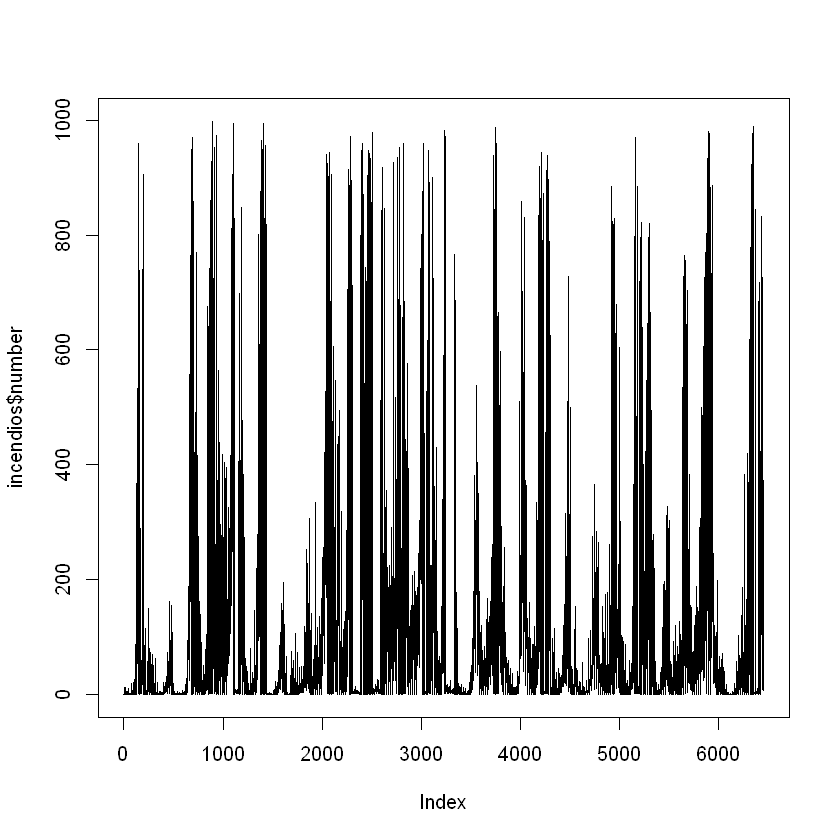

In [8]:
#Plotagem dos dados originais sem consolidação
plot(incendios$number, type="l")

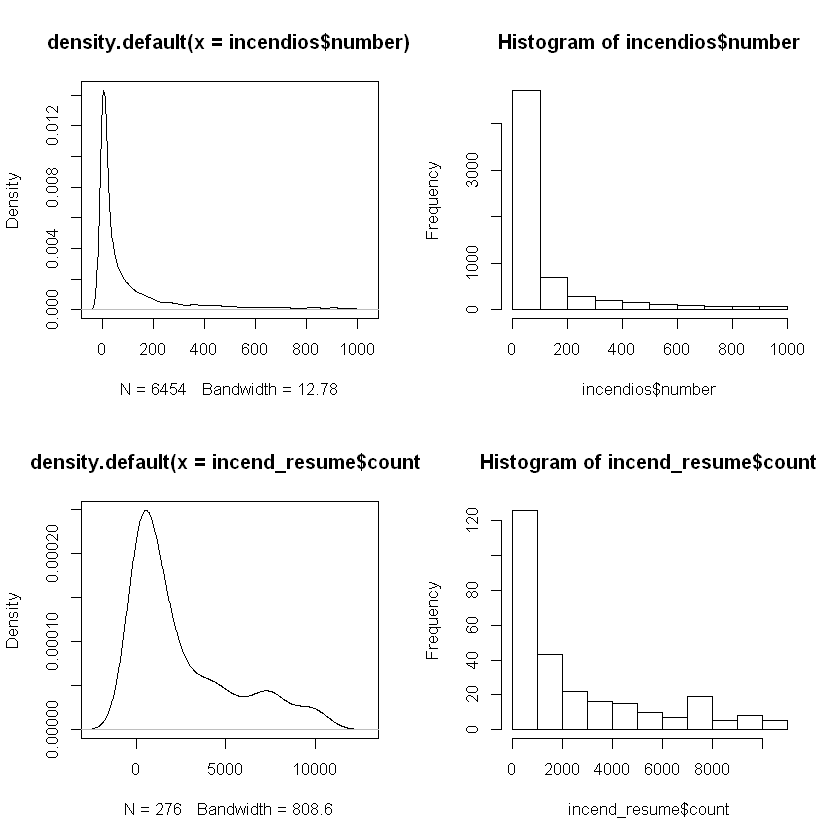

In [9]:
#Análise gráfico dos dados originais
par(mfrow=c(2,2))
den <- density(incendios$number)
plot(den)
hist(incendios$number)
den2 <- density(incend_resume$count)
plot(den2)
hist(incend_resume$count)
par(mfrow=c(1,1))

`summarise()` ungrouping output (override with `.groups` argument)


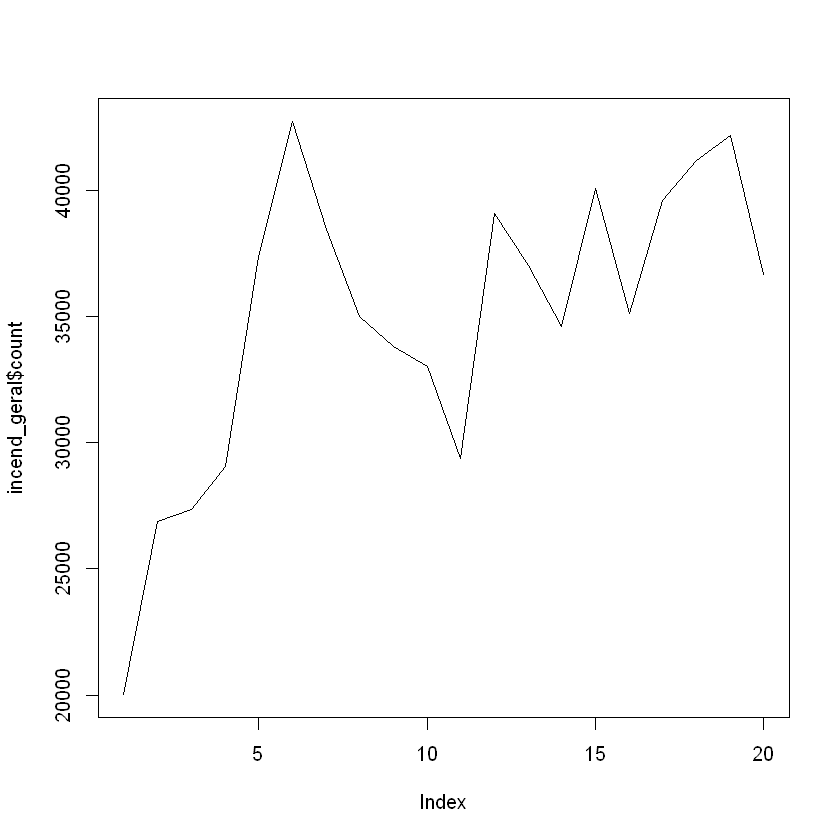

In [10]:
#Plotagem dos dados originais organizados por tempo
incend_geral <- incendios %>% 
  group_by(date) %>%
  summarize(count=sum(number, na.rm=TRUE))


plot(incend_geral$count, type="l")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

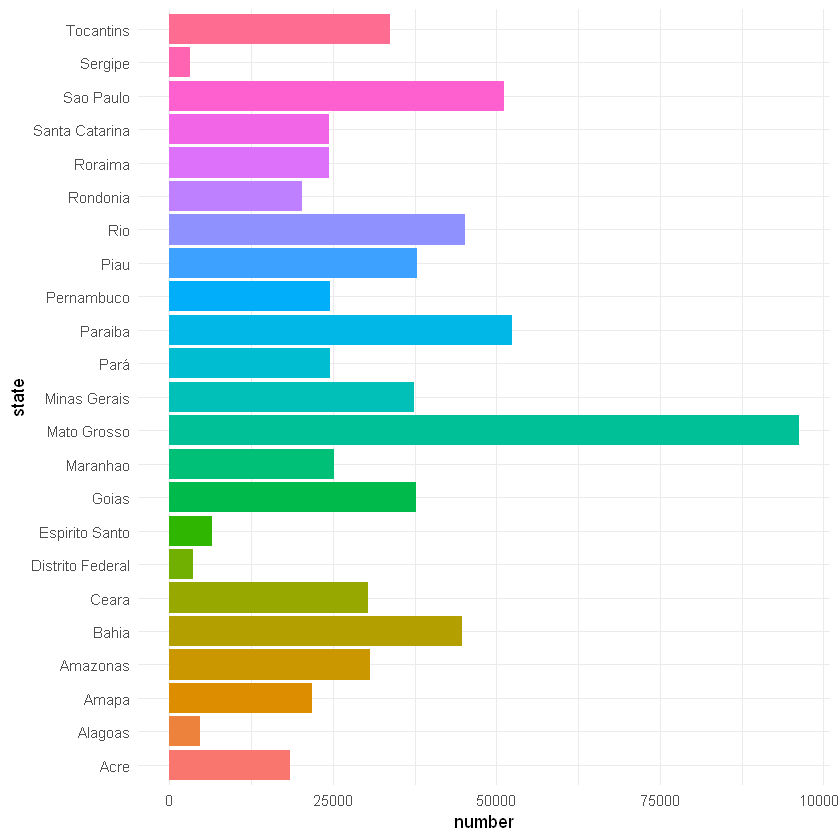

In [11]:
library(ggplot2)
df <- incendios
por_anos <- df %>% group_by(year)
by_states <- df %>% group_by(state)
ggplot(data=by_states,aes(x=state,y=number)) + geom_col(aes(fill=state)) + coord_flip(
) + theme_minimal() +  theme(legend.position = "none") 

#==================================================================

**Pré-processamento dos dados e Continuação da análise exploratória**

#==================================================================

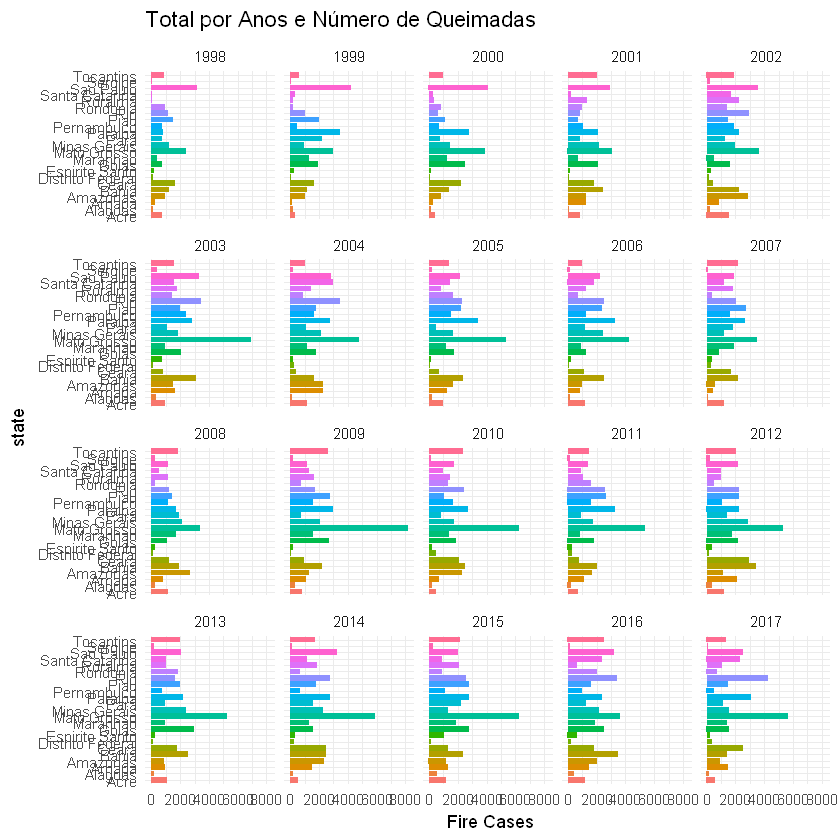

In [12]:
ggplot(data = by_states,aes(x=state,y=number)) + geom_col(aes(fill=state)) + 
  coord_flip() + facet_wrap(~year) +  theme(legend.position = "none") + 
ggtitle("Total por Anos e Número de Queimadas") +ylab(" Fire Cases") + 
theme_minimal() +  theme(legend.position = "none")

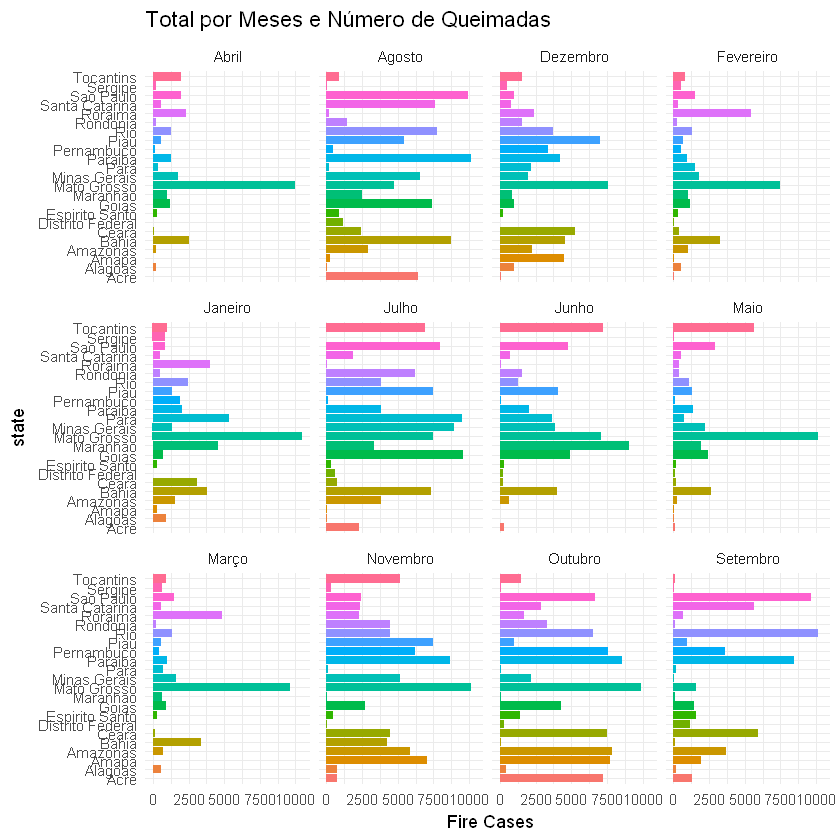

In [13]:
ggplot(data = by_states,aes(x=state,y=number)) + geom_col(aes(fill=state)) + 
  coord_flip() + facet_wrap(~month) +  theme(legend.position = "none") + 
ggtitle("Total por Meses e Número de Queimadas") +
ylab(" Fire Cases") + theme_minimal() +  theme(legend.position = "none")

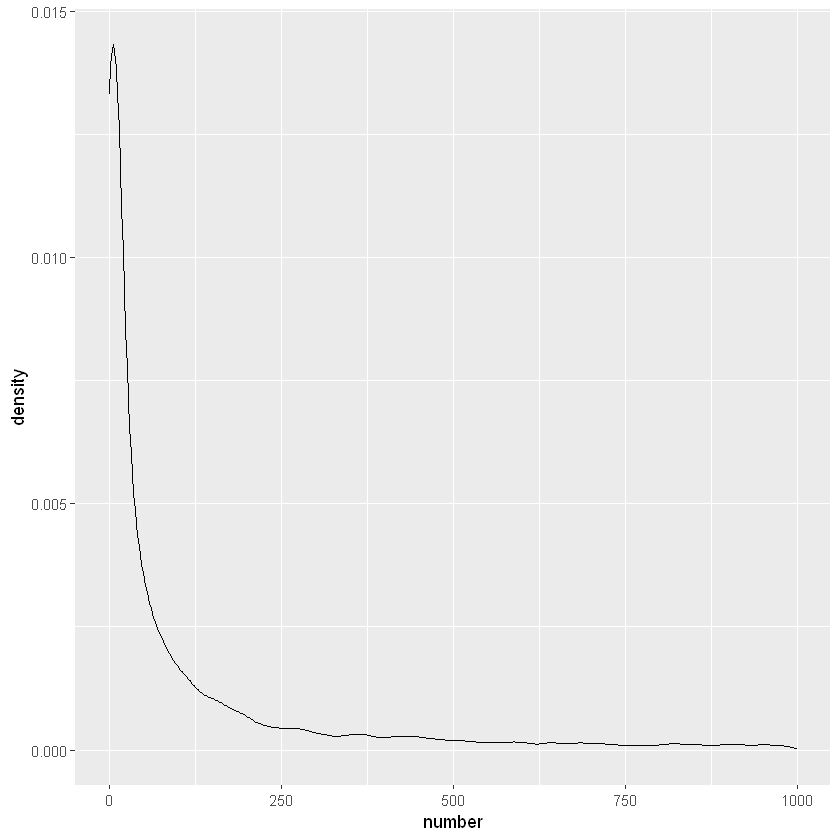

In [14]:
#Número de casos relatados ao longo do tempo
ggplot(data=df,aes(x=number)) + geom_density()

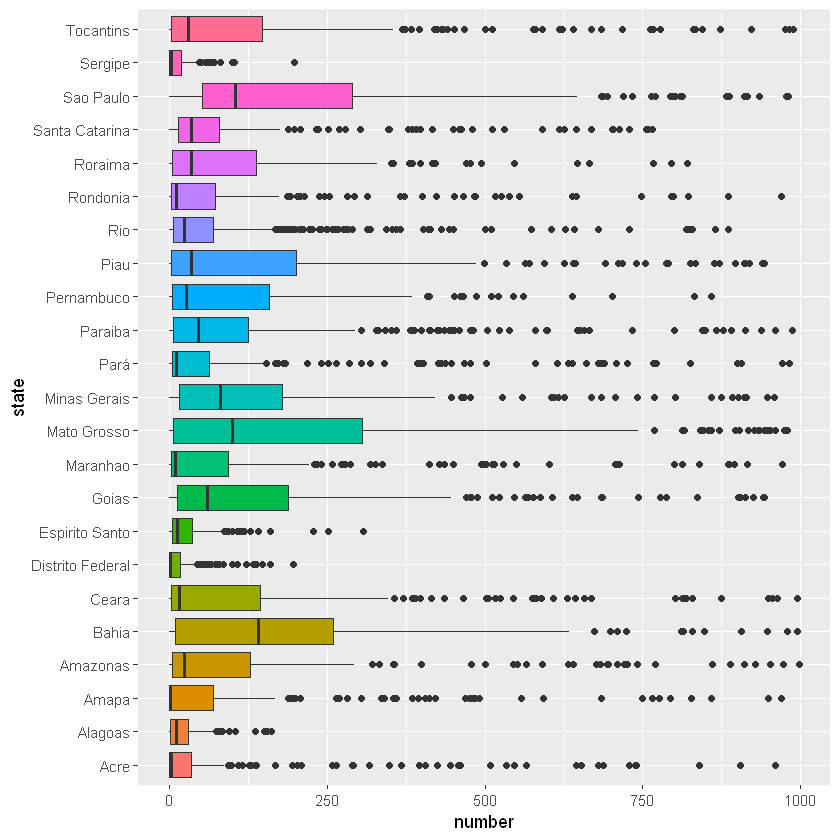

In [15]:
#Esta distribuição está com altíssimos outileiers
ggplot(data = df,aes(x=state,y=number)) + geom_boxplot(aes(fill=state)) + 
theme(legend.position = "none") + coord_flip()

`summarise()` ungrouping output (override with `.groups` argument)


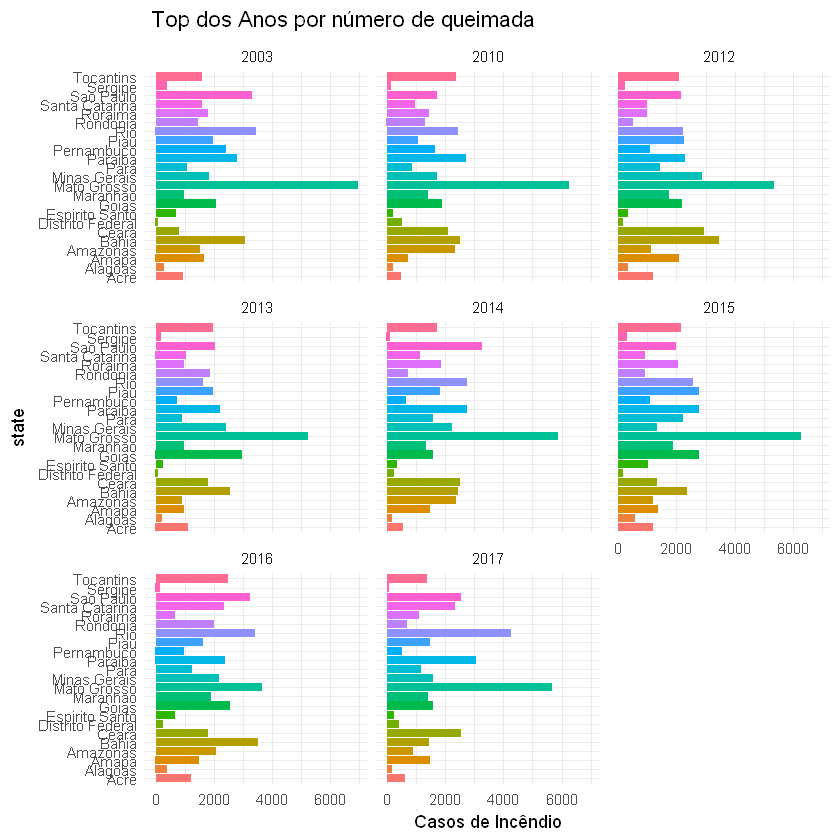

In [16]:
top.years <- summarise(.data=por_anos,
                       ocorrencia_fogo = mean(number,trim = 0.4),
                       Median_value=median(number))  %>% arrange(desc(ocorrencia_fogo)) %>% filter(ocorrencia_fogo > 30) %>% select(year) %>% pull()

top.years.fires <-  filter(.data = por_anos, year %in% top.years)
ggplot(data = top.years.fires,aes(x=state,y=number)) + geom_col(aes(fill=state)) + 
  coord_flip() + facet_wrap(~year) +  theme(legend.position = "none") +
ggtitle(" Top dos Anos por número de queimada") +ylab("Casos de Incêndio") + theme_minimal() +  theme(legend.position = "none")

In [17]:
# Meses com maior número de incêndios
top.months <- df %>% group_by(month) %>%  summarise(
    Trimmed_Mean_Fire_Cases=mean(number,trim = 0.4 ),
    Median_Value=median(number)) %>% arrange(desc( Trimmed_Mean_Fire_Cases))  %>%  filter(Trimmed_Mean_Fire_Cases > 30) %>% select(month) %>% pull()

top.months.df <- df %>% filter(month %in% top.months)

`summarise()` ungrouping output (override with `.groups` argument)


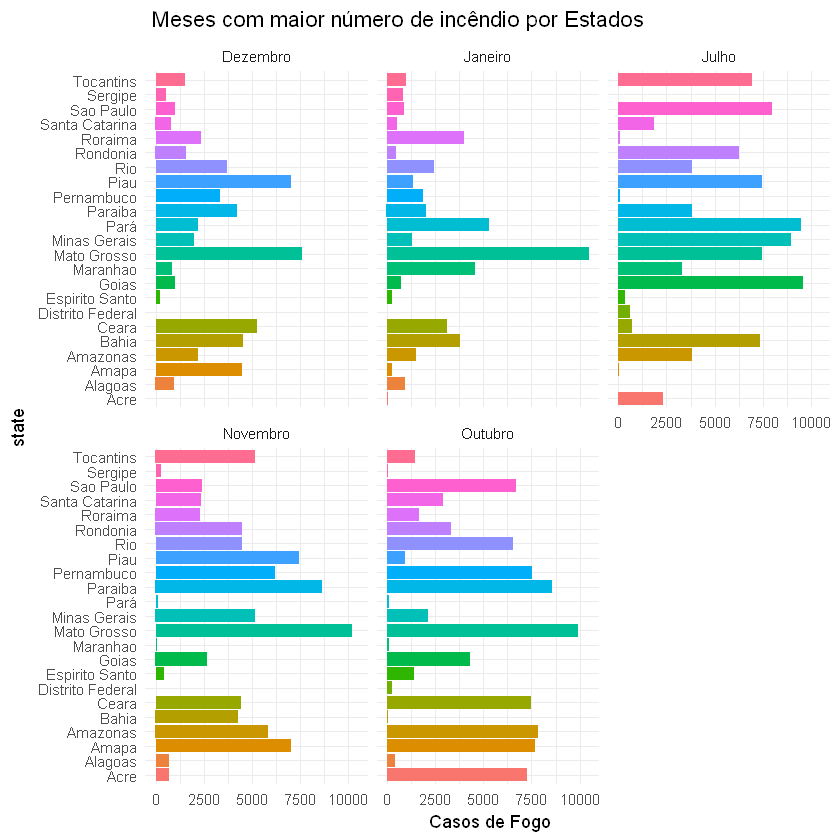

In [18]:
ggplot(data = top.months.df,aes(x=state,y=number)) + geom_col(aes(fill=state)) + coord_flip() + facet_wrap(~month) +  
  theme(legend.position = "none") + 
ggtitle(" Meses com maior número de incêndio por Estados") +
ylab(" Casos de Fogo") +  theme_minimal() +  theme(legend.position = "none")

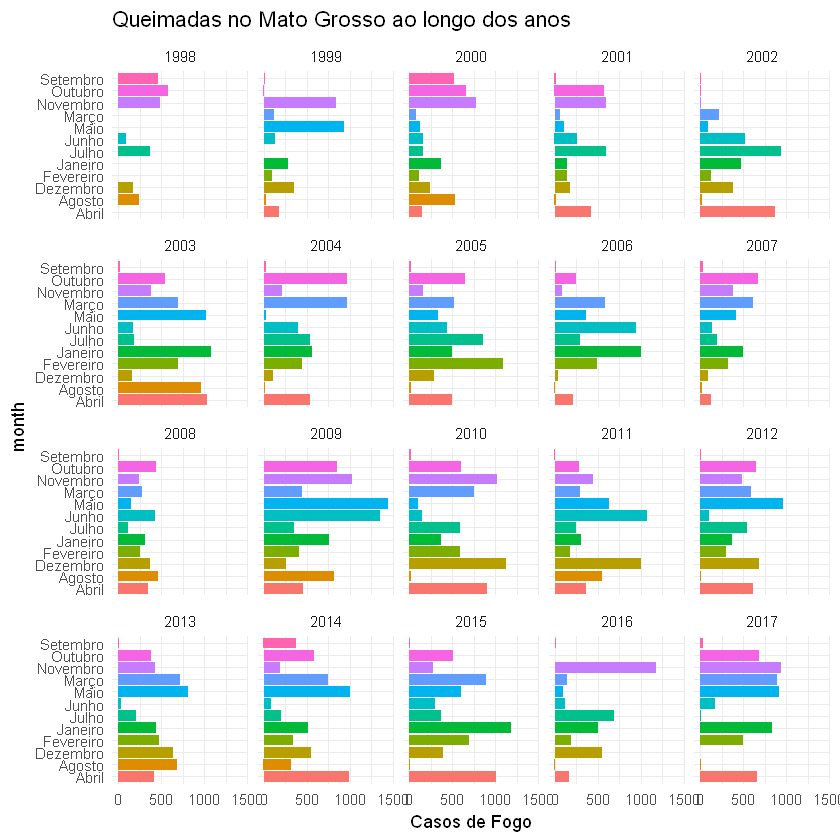

In [19]:
ggplot(data = filter(.data = df ,state == 'Mato Grosso' ),
       aes(x=month,y=number)) + geom_col(aes(fill=month))+ coord_flip() + facet_wrap(~year) +
  theme(legend.position = "none") + ggtitle("Queimadas no Mato Grosso ao longo dos anos") +
ylab("Casos de Fogo") +  theme_minimal() +  theme(legend.position = "none")

In [22]:
#Organização temporal dos dados e conversão de campos texto (month) em numérico

mesS2N <- function(strM) {
  #Função converte mês de string para inteiro
  
  numM <- switch(strM,
                 "Janeiro"=1,
                 "Fevereiro"=2,
                 "Março"=3,
                 "Abril"=4,
                 "Maio"=5,
                 "Junho"=6,
                 "Julho"=7,
                 "Agosto"=8,
                 "Setembro"=9,
                 "Outubro"=10,
                 "Novembro"=11,
                 "Dezembro"=12,
                 "Inválido")
  
  return(numM)
}

incendios$monthN <- sapply(incendios$month, mesS2N)

Warning message in switch(strM, Janeiro = 1, Fevereiro = 2, Março = 3, Abril = 4, :
"EXPR is a "factor", treated as integer.
 Consider using 'switch(as.character( * ), ...)' instead."Warning message in switch(strM, Janeiro = 1, Fevereiro = 2, Março = 3, Abril = 4, :
"EXPR is a "factor", treated as integer.
 Consider using 'switch(as.character( * ), ...)' instead."Warning message in switch(strM, Janeiro = 1, Fevereiro = 2, Março = 3, Abril = 4, :
"EXPR is a "factor", treated as integer.
 Consider using 'switch(as.character( * ), ...)' instead."Warning message in switch(strM, Janeiro = 1, Fevereiro = 2, Março = 3, Abril = 4, :
"EXPR is a "factor", treated as integer.
 Consider using 'switch(as.character( * ), ...)' instead."Warning message in switch(strM, Janeiro = 1, Fevereiro = 2, Março = 3, Abril = 4, :
"EXPR is a "factor", treated as integer.
 Consider using 'switch(as.character( * ), ...)' instead."Warning message in switch(strM, Janeiro = 1, Fevereiro = 2, Março = 3, Abril = 4, :
"

In [23]:
incend_geral <- incendios %>% 
  group_by(monthN, year) %>%
  summarize(count=sum(number, na.rm=TRUE))

head(incend_geral)

`summarise()` regrouping output by 'monthN' (override with `.groups` argument)


monthN,year,count
1,1998,0
1,1999,717
1,2000,537
1,2001,1081
1,2002,1682
1,2003,2677


In [24]:
#Ordenar coluns por tempo
incend_geral <- arrange(incend_geral, incend_geral$year, incend_geral$monthN)

#Incluir coluna time geral
incend_geral$time <- c(1:length(incend_geral$count))

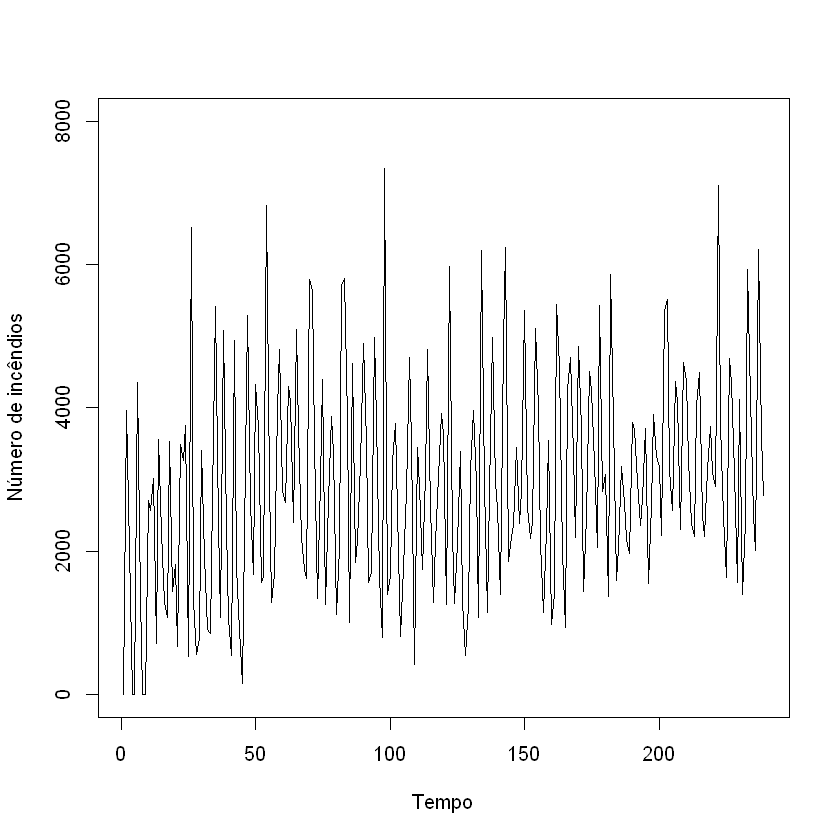

In [25]:
#Análise de dados processados
plot(incend_geral$count, type="l", ylim = c(0,8000), xlab="Tempo", ylab="Número de incêndios")

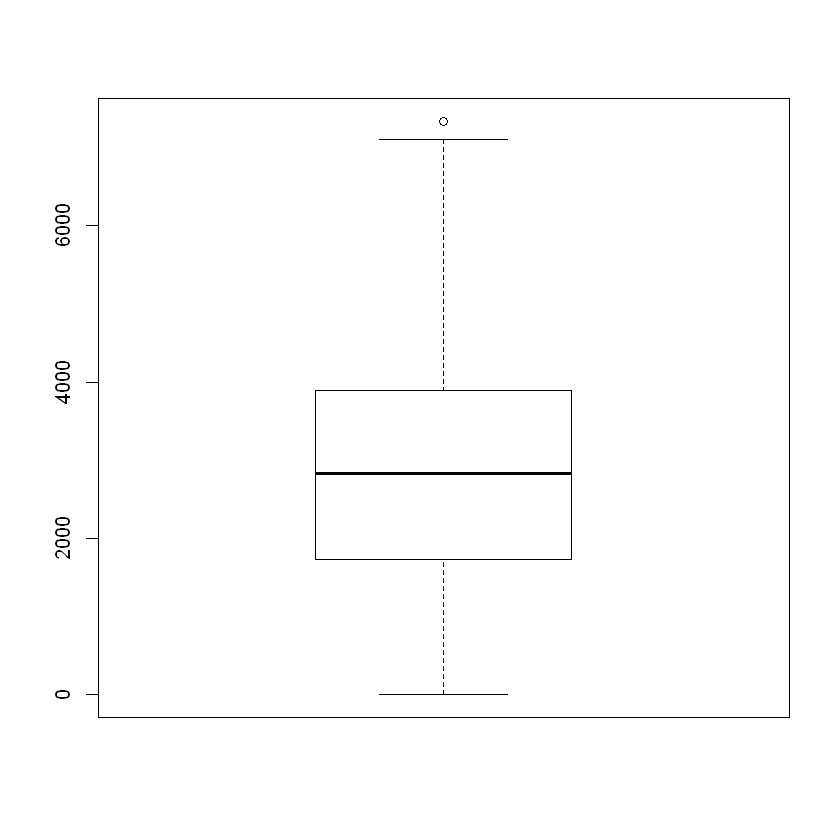

In [26]:
boxplot(incend_geral$count)

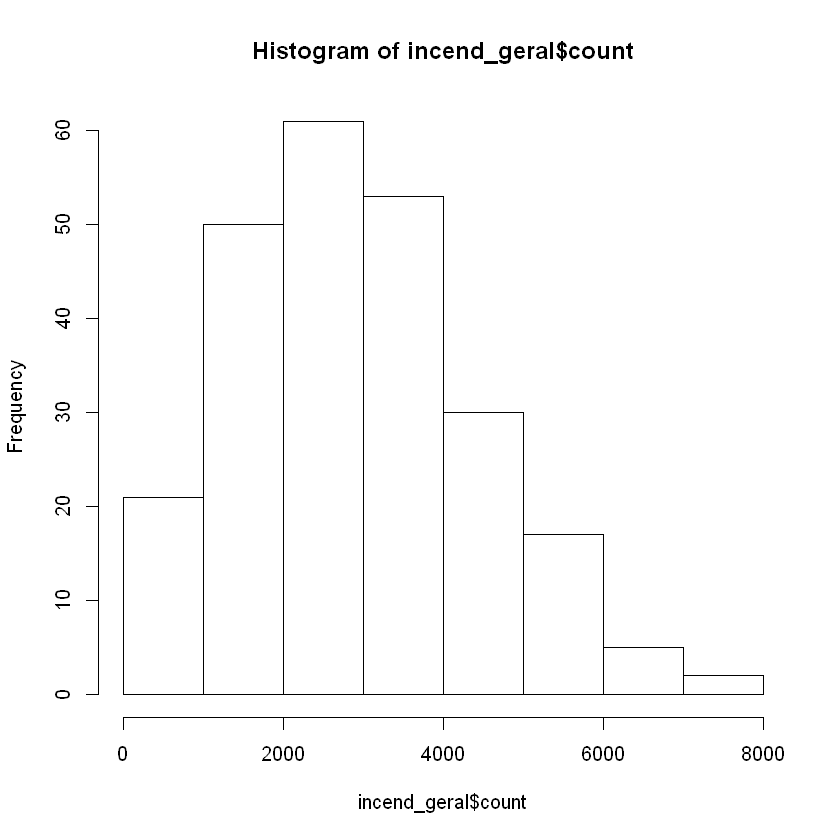

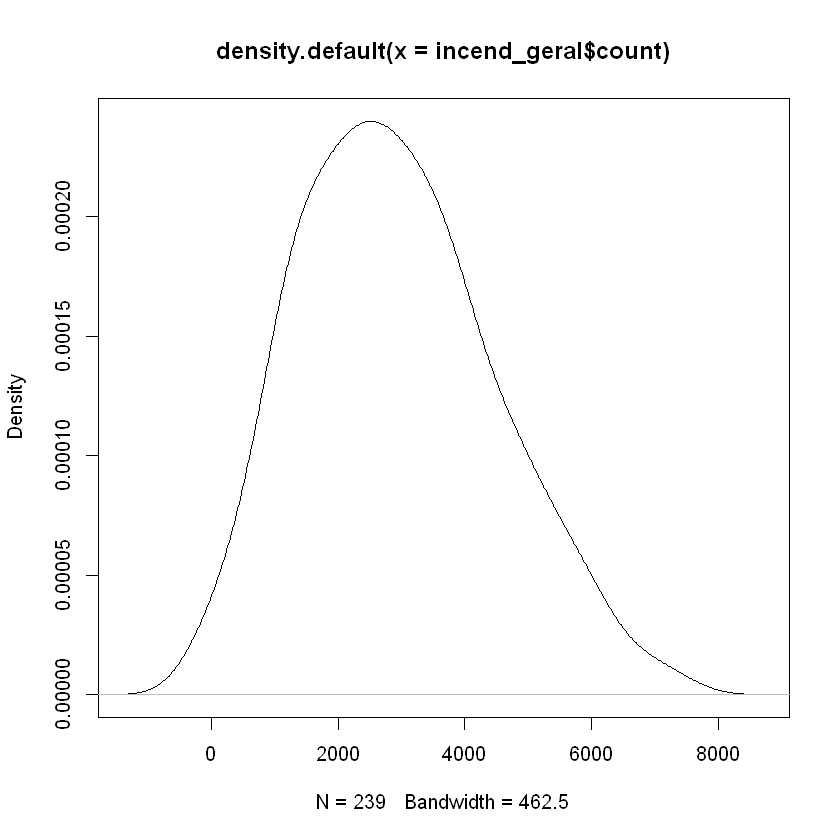

In [27]:
hist(incend_geral$count)
plot(density(incend_geral$count))

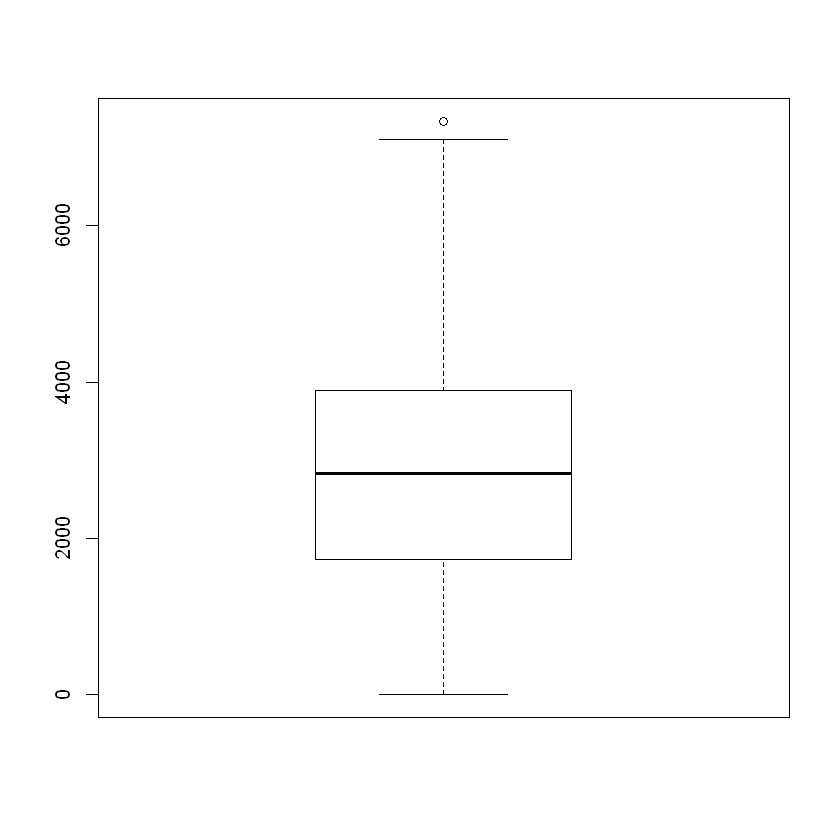

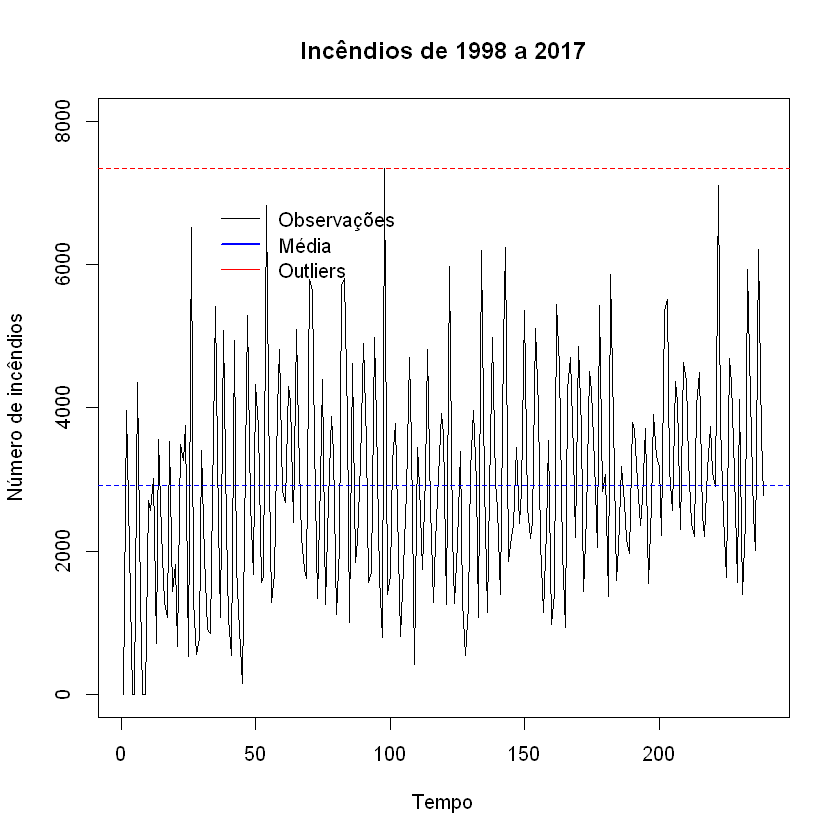

In [28]:
#Análise visual de outliers baseada apenas no boxplot
#================================================
bp <- boxplot(incend_geral$count)
out <- bp$out #Outliers identificado pelo boxplot

#Plotagem da série temporal, média e outlier
plot(incend_geral$count, type="l", ylim = c(0,8000),
     ylab = "Número de incêndios",
     xlab = "Tempo",
     main = "Incêndios de 1998 a 2017")
abline(h = mean(incend_geral$count), col = "blue", lty = 2)
abline(h = out, col = "red", lty = 2)
legend(x=30, y=7000, legend=c("Observações", "Média", "Outliers"), lwd=c(1,2),
       col = c("black", "blue", "red"), bty = "n")

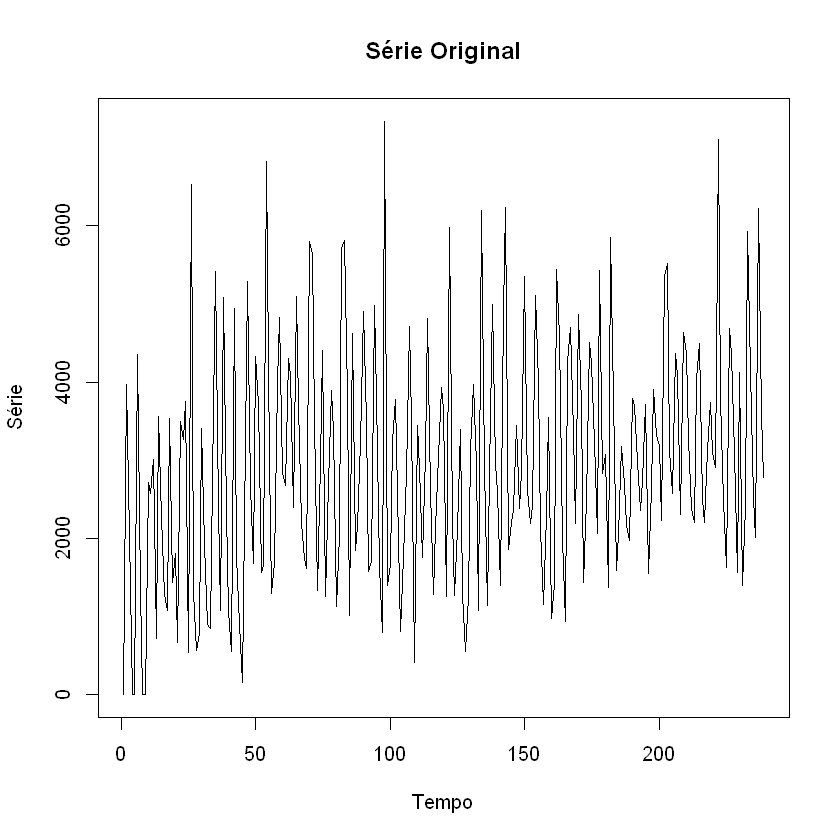

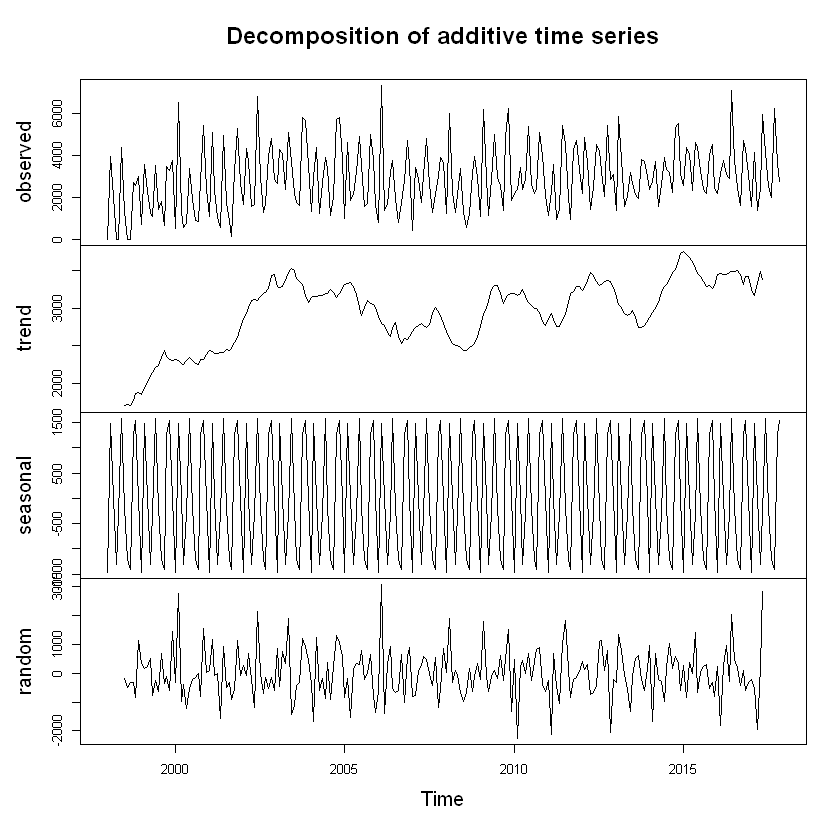

In [29]:
#Decomposição dos componentes da série temporal
#================================================
data <- incend_geral$count

tsdata <- ts(data,
             start=c(1998, 1),
             frequency=12)

#Visualização da série original
plot.ts(data, main="Série Original", xlab="Tempo", ylab="Série")

#Decomposição dos componentes da série (observações, tendência, sazonal e ruídos)
decomp <- decompose(tsdata, type = "additive")
plot(decomp)

#========================================================

**Mineração de Série Temporais**

**Detecção de eventos**

#========================================================

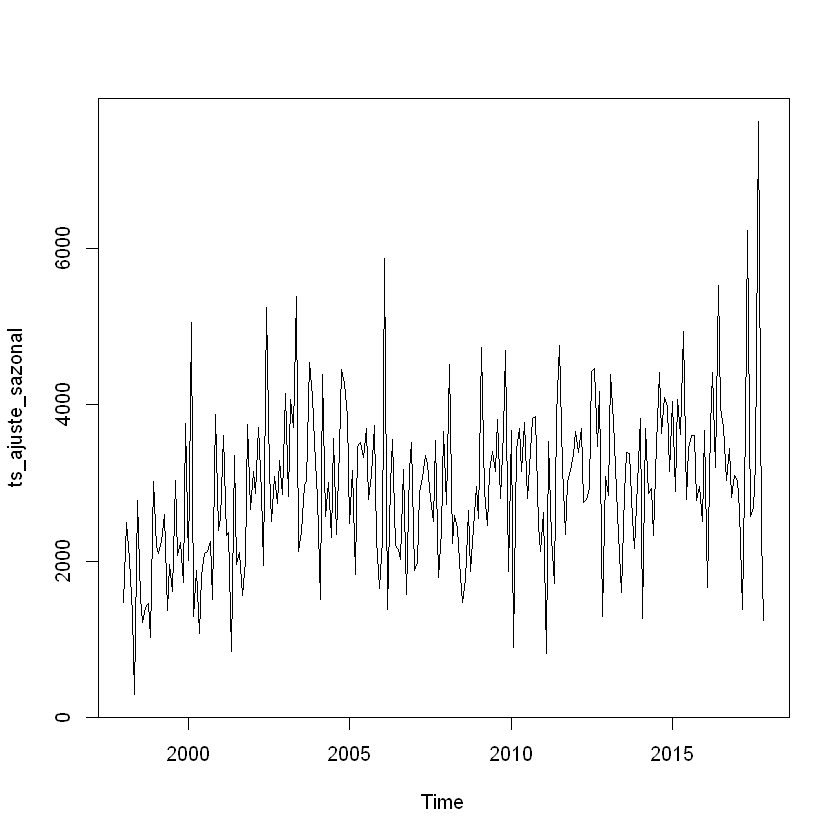

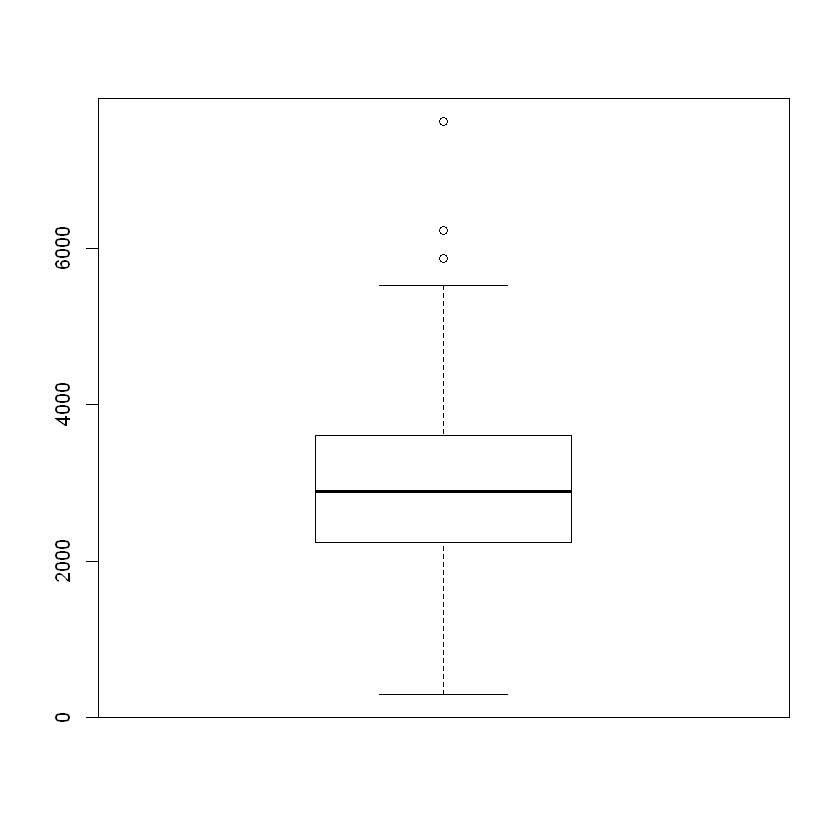

In [38]:
#Série sem o componente sazonal
ts_ajuste_sazonal <- data - decomp$seasonal
plot(ts_ajuste_sazonal)

boxplot(ts_ajuste_sazonal)

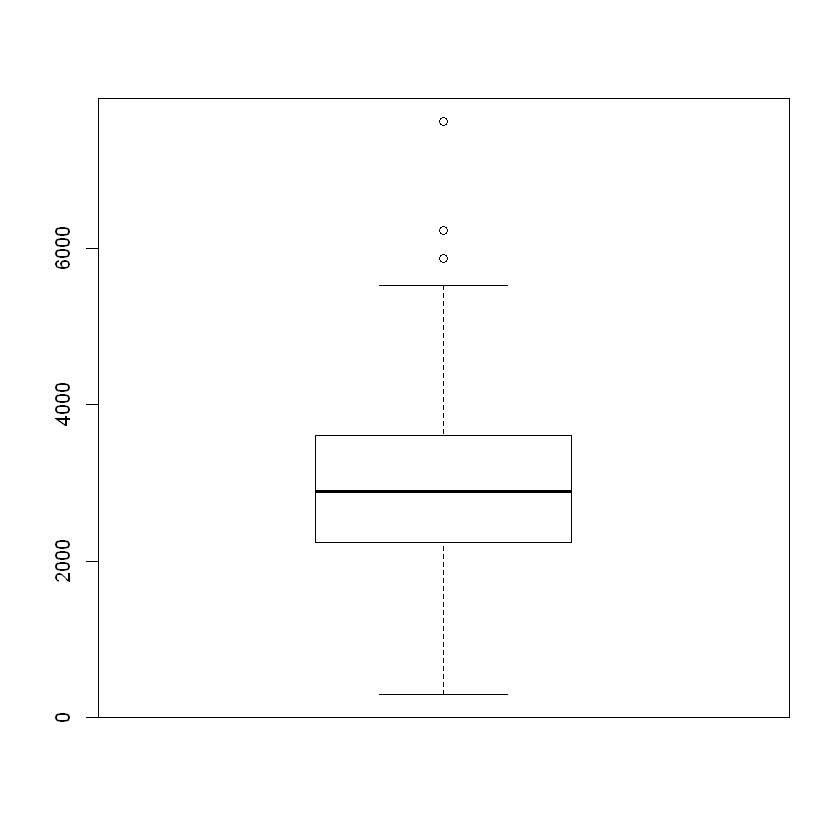

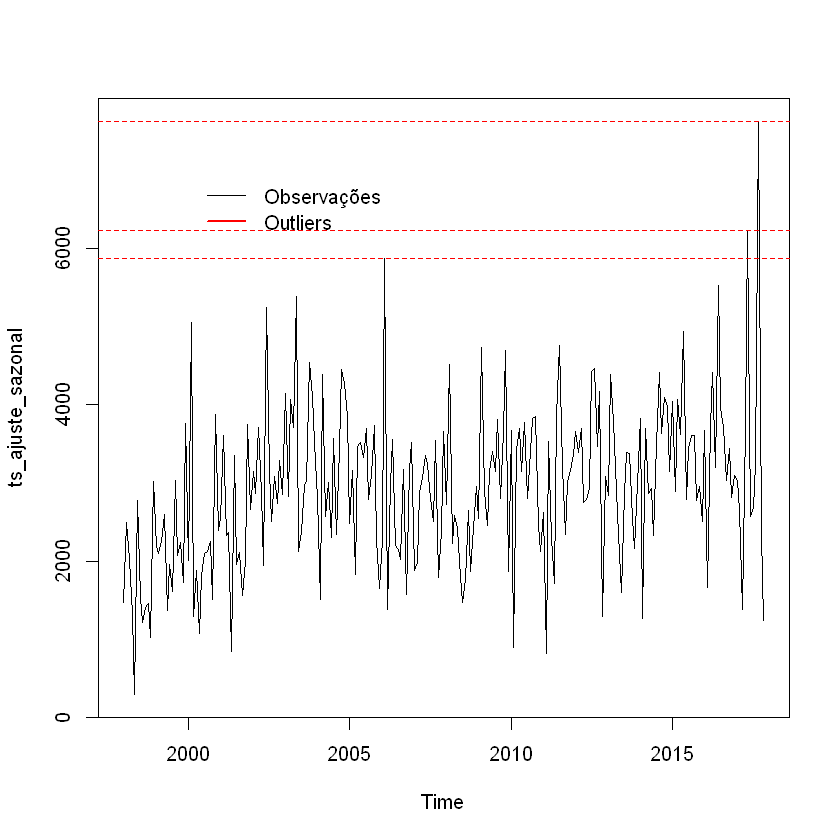

In [37]:
#Análise outlier na série sem componente sazonal
bp_as <- boxplot(ts_ajuste_sazonal)
plot(ts_ajuste_sazonal)
abline(h = bp_as$out, col = "red", lty = 2)
legend(x=2000, y=7000, legend=c("Observações", "Outliers"), lwd=c(1,2),
       col = c("black", "red"), bty = "n")

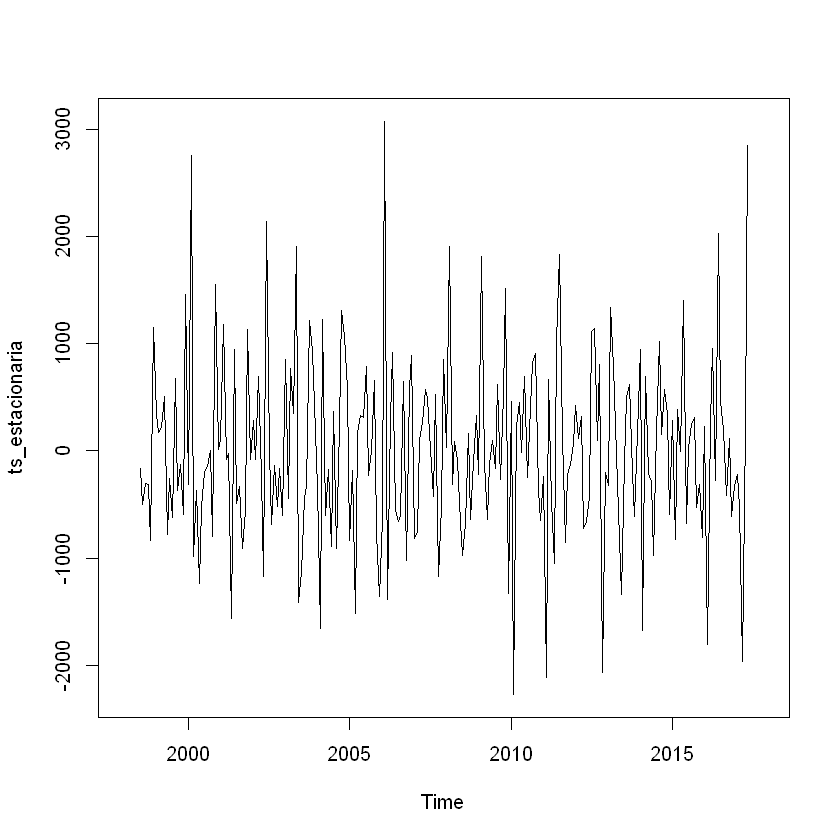

In [44]:
#Série temporal transformada (sem comp. sazonal e tendência)
ts_estacionaria <- ts_ajuste_sazonal - decomp$trend

plot(ts_estacionaria)

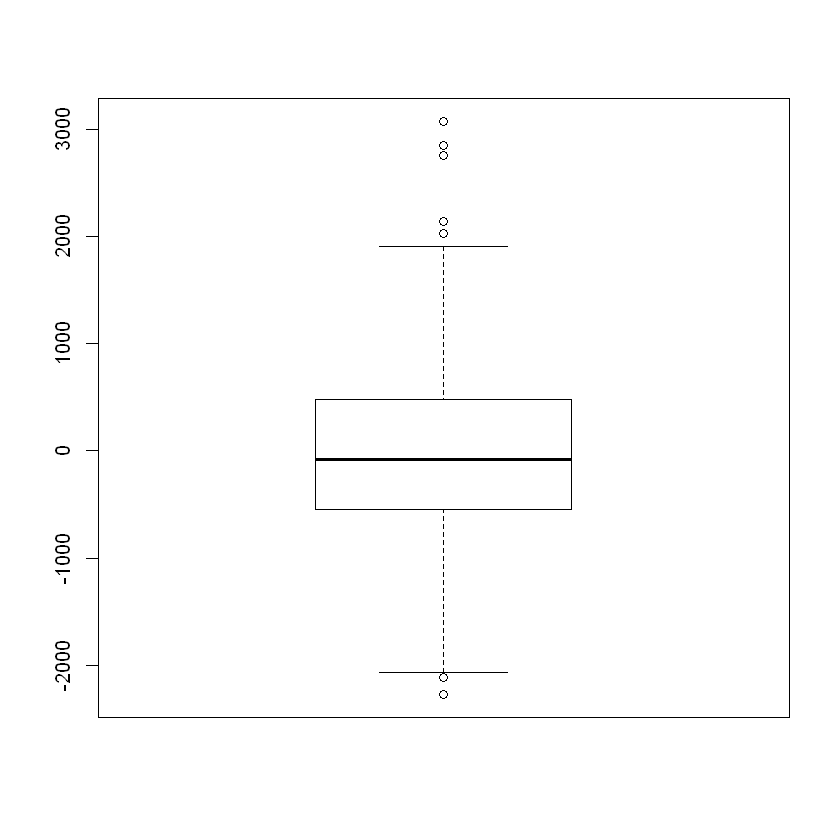

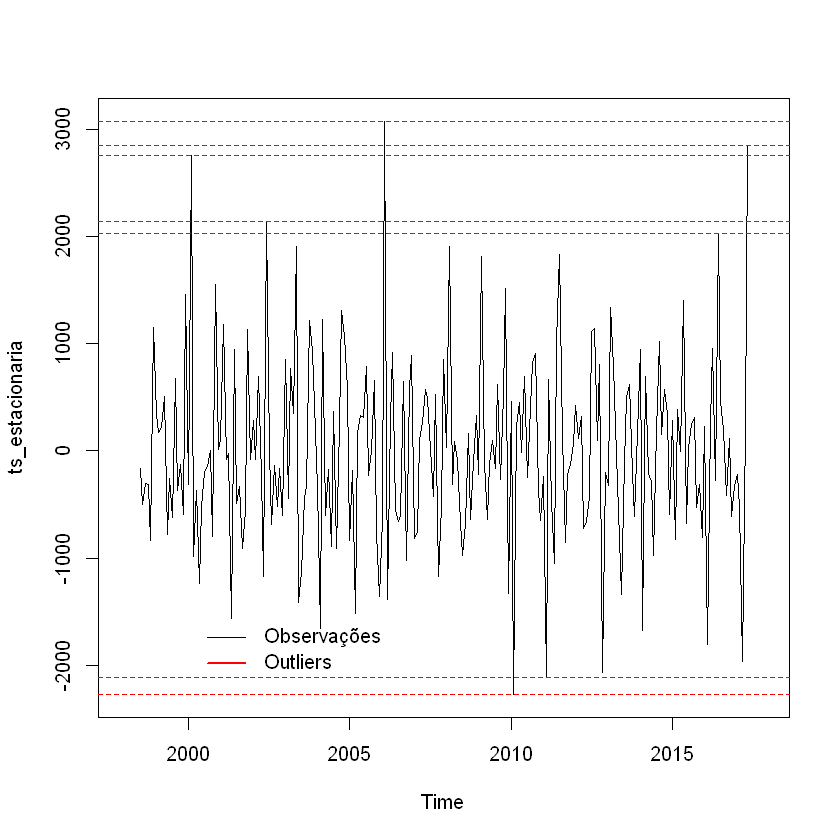

In [45]:
bp_es <- boxplot(ts_estacionaria)
plot(ts_estacionaria)
abline(h = c(bp_es$out), col = "red", lty = 2)
legend(x=2000, y=-1500, legend=c("Observações", "Outliers"), lwd=c(1,2),
       col = c("black", "red"), bty = "n")

In [30]:
#Detecção de eventos
#Framework Harbinger
source( "https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/harbinger.R" )
library("tseries")
test <- subset(incend_geral, select=c(time, count))

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


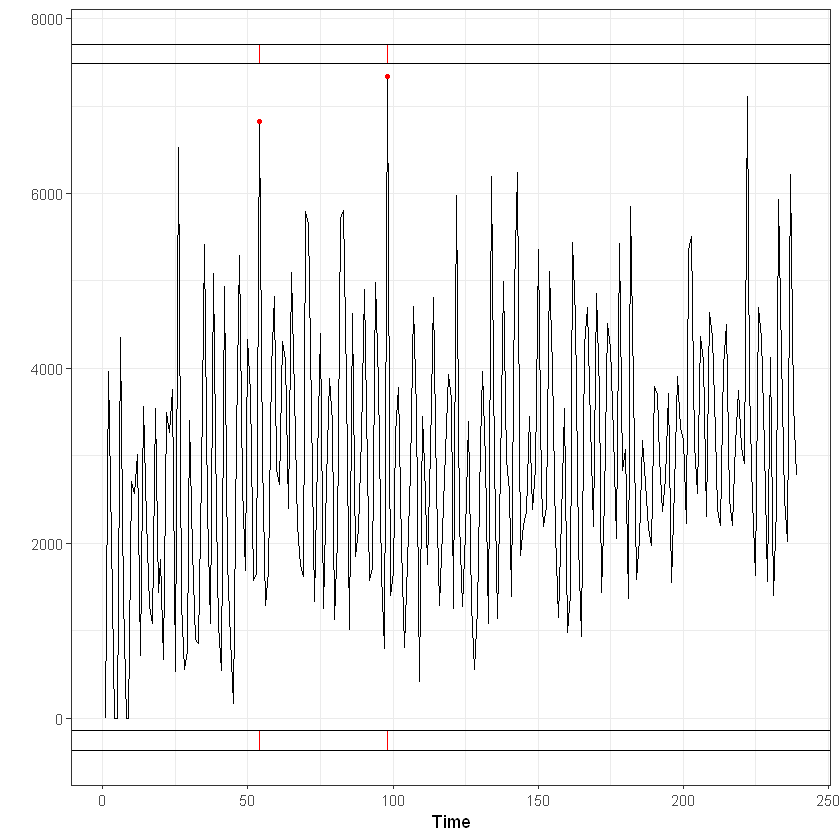

In [31]:
#Adaptive Normalization Outliers
#Detect
events_an <- evtdet.an_outliers(test,w=30,alpha=1.5,na.action=na.omit)

#Plot
print(evtplot(test, events_an, mark.cp = TRUE))

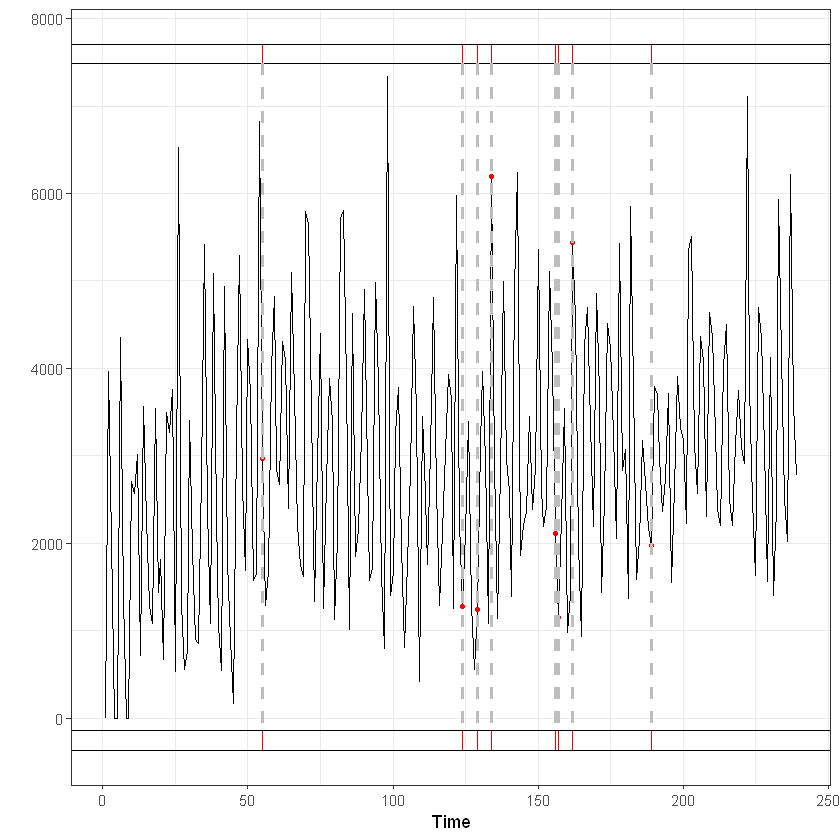

In [32]:
#====== Seminal Change Point (1999) ======
#Detect
events_scp <- evtdet.seminalChangePoint(test, w=30, na.action=na.omit)

#Plot
#print(evtplot(test,events_scp, reference))
print(evtplot(test, events_scp, mark.cp = TRUE))

In [33]:
#====== Change Finder (2005) ======
#Detect
ARIMA <- function(data) forecast::auto.arima(data)
linreg <- function(data) {
  #browser()
  data <- as.data.frame(data)
  colnames(data) <- "x"
  data$t <- 1:nrow(data)
  #Adjusting a linear regression to the whole window
  lm(x~t, data)
}

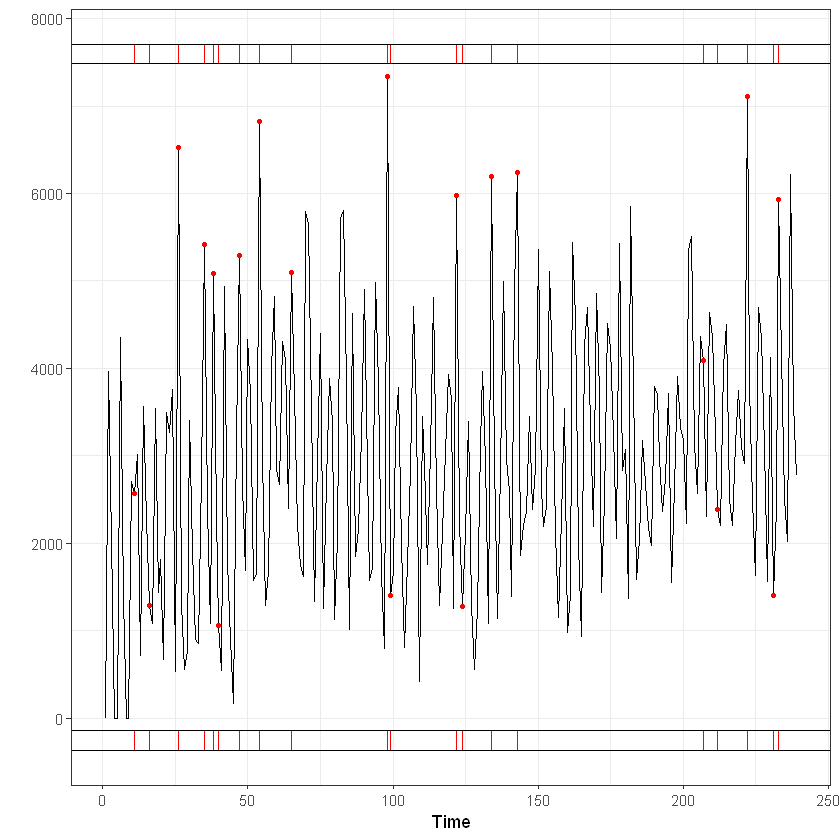

In [34]:
#Detect - change finder com modelo arima
events_cf_arima <- evtdet.changeFinder(test,mdl=ARIMA,m=5,na.action=na.omit)

print(evtplot(test,events_cf_arima, mark.cp=TRUE))

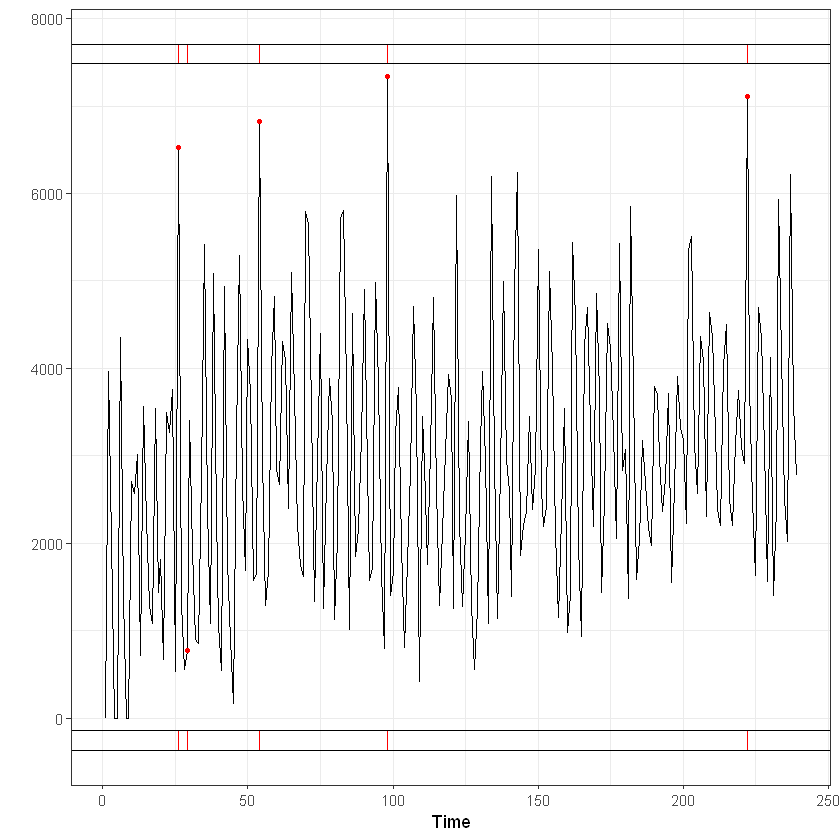

In [35]:
#Detect - change finder com modelo regressão linear
events_cf_linreg <- evtdet.changeFinder(test,mdl=linreg,m=5,na.action=na.omit)

print(evtplot(test,events_cf_linreg, mark.cp=TRUE))

#========================================================

**Mineração de Série Temporais**

**Predição de próximas observações**

#========================================================

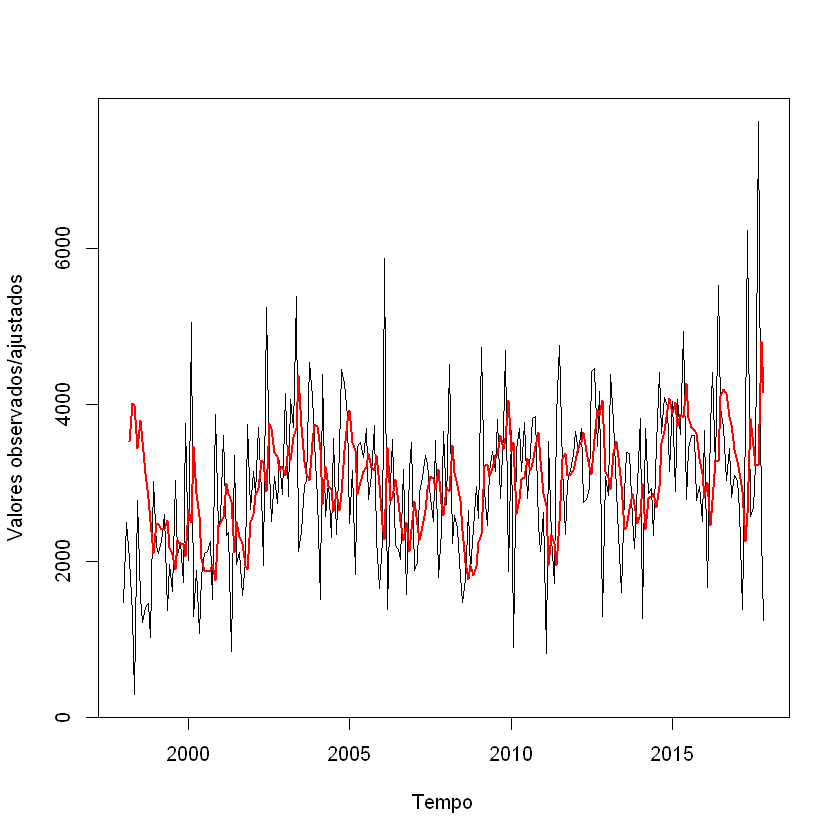

In [39]:
#Análise da série por suavização exponencial de holt
ajuste_holt <- HoltWinters(ts_ajuste_sazonal, gamma = FALSE)
#ajuste_holt

#Valores ajustados
plot(ts_ajuste_sazonal, xlab = "Tempo", ylab = "Valores observados/ajustados")
lines(fitted(ajuste_holt)[,1], lwd = 2, col = "red")

In [40]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"

In [41]:
#Previsão de próximas 12 ocorrências
prev_holt <- forecast(ajuste_holt, h=12, level=95)
prev_holt

         Point Forecast       Lo 95    Hi 95
Dec 2017       3201.562   951.38994 5451.734
Jan 2018       3140.506   748.01563 5532.997
Feb 2018       3079.451   509.49250 5649.409
Mar 2018       3018.395   236.87802 5799.913
Apr 2018       2957.340   -67.88955 5982.570
May 2018       2896.285  -402.46565 6195.035
Jun 2018       2835.229  -764.43743 6434.895
Jul 2018       2774.174 -1151.52317 6699.870
Aug 2018       2713.118 -1561.66657 6987.903
Sep 2018       2652.063 -1993.06480 7297.190
Oct 2018       2591.007 -2444.16039 7626.175
Nov 2018       2529.952 -2913.61673 7973.520

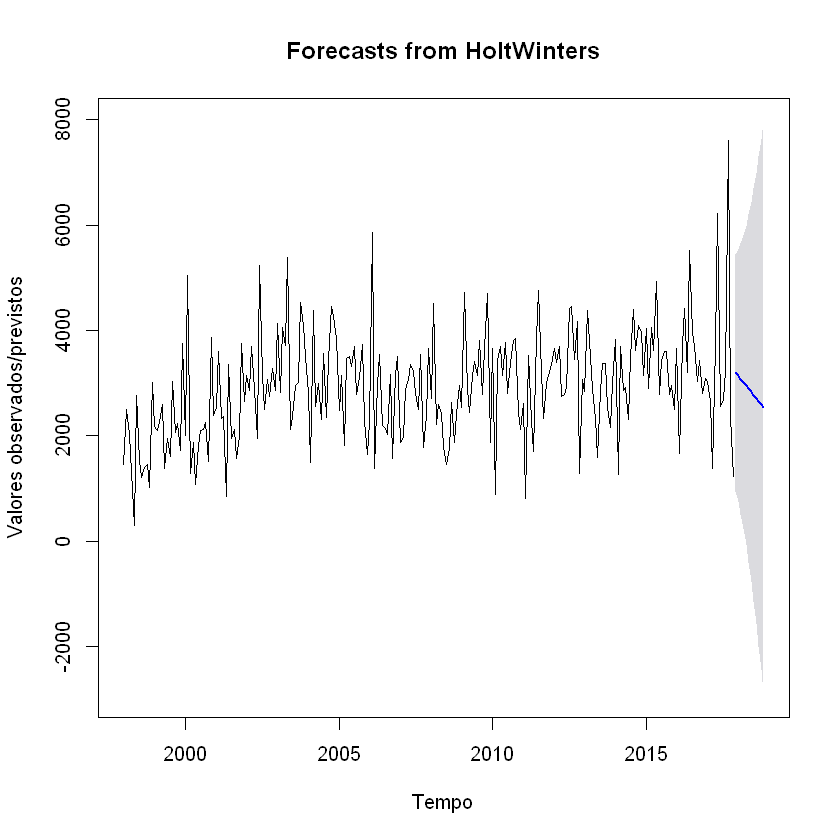

In [42]:
#Visualização da previsão
plot(prev_holt, xlab = "Tempo", ylab = "Valores observados/previstos")

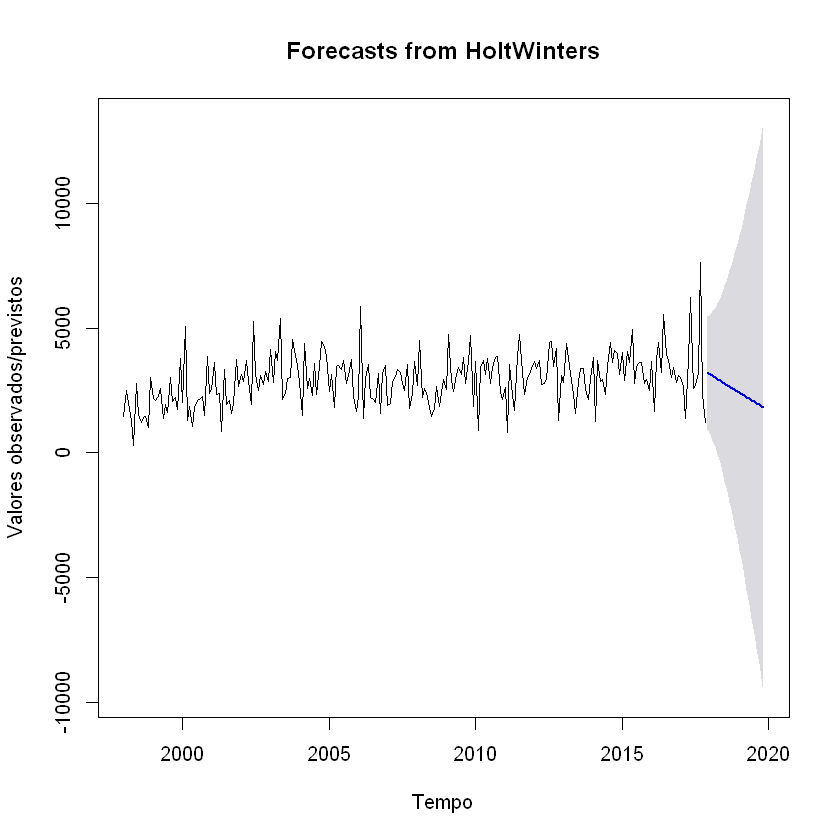

In [43]:
#Previsão de próximas 24 ocorrências
prev_holt <- forecast(ajuste_holt, h=24, level=95)
#Visualização da previsão
plot(prev_holt, xlab = "Tempo", ylab = "Valores observados/previstos")